## Lab 6: Ryan Eller - New York

In [21]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [22]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

## Q1: Population Growth Rate : Do the Calculaton in SQL

In [23]:
query = """
SELECT 
    year,
    pop AS population,
    ROUND(
        (pop - LAG(pop) OVER (ORDER BY year))::NUMERIC 
        / LAG(pop) OVER (ORDER BY year) * 100, 
        2
    ) AS growth_rate
FROM 
    population
WHERE 
    fips = '36'
ORDER BY 
    year;
"""

In [24]:
import pandas as pd

query = pd.read_sql(query, con=conn)
query.head() #show the top 5 rows

/tmp/ipykernel_15688/3422334410.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query = pd.read_sql(query, con=conn)


,year,population,growth_rate
0,2005,18655275,NaN
1,2006,19306183,3.49
2,2007,19297729,-0.04
3,2008,19490297,1.00
4,2009,19541453,0.26


In [25]:
! pip install jupyter-ai-magics[all] -q

In [26]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

Note: you may need to restart the kernel to use updated packages.


In [28]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [29]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [30]:
%%ai gpt4
What is included in the {query}

| year | population | growth_rate |
|------|------------|-------------|
| 2005 | 18655275   | NaN         |
| 2006 | 19306183   | 3.49        |
| 2007 | 19297729   | -0.04       |
| 2008 | 19490297   | 1.00        |
| 2009 | 19541453   | 0.26        |
| 2010 | 19392283   | -0.76       |
| 2011 | 19465197   | 0.38        |
| 2012 | 19570261   | 0.54        |
| 2013 | 19651127   | 0.41        |
| 2014 | 19746227   | 0.48        |
| 2015 | 19795791   | 0.25        |
| 2016 | 19745289   | -0.26       |
| 2017 | 19849399   | 0.53        |
| 2018 | 19542209   | -1.55       |
| 2019 | 19453561   | -0.45       |

In [31]:
%%ai gpt4 -f code
Calculate the growth rate with the data provided in {query}, use the query directly, and visualize the result on a line chart with the growth rate
Chart must include the NY state name in the title

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is a pandas dataframe with the given data
df = pd.DataFrame({
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'population': [18655275, 19306183, 19297729, 19490297, 19541453, 19392283, 19465197, 19570261, 19651127, 19746227, 19795791, 19745289, 19849399, 19542209, 19453561],
    'growth_rate': [None, 3.49, -0.04, 1.00, 0.26, -0.76, 0.38, 0.54, 0.41, 0.48, 0.25, -0.26, 0.53, -1.55, -0.45]
})

# Plotting
plt.plot(df['year'], df['growth_rate'])

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Population Growth Rate in NY State 2005-2019")

# Displaying the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is a pandas dataframe with the given data
df = pd.DataFrame({
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'population': [18655275, 19306183, 19297729, 19490297, 19541453, 19392283, 19465197, 19570261, 19651127, 19746227, 19795791, 19745289, 19849399, 19542209, 19453561],
    'growth_rate': [None, 3.49, -0.04, 1.00, 0.26, -0.76, 0.38, 0.54, 0.41, 0.48, 0.25, -0.26, 0.53, -1.55, -0.45]
})

# Plotting
plt.plot(df['year'], df['growth_rate'])

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Population Growth Rate in NY State 2005-2019")

# Displaying the plot
plt.show()

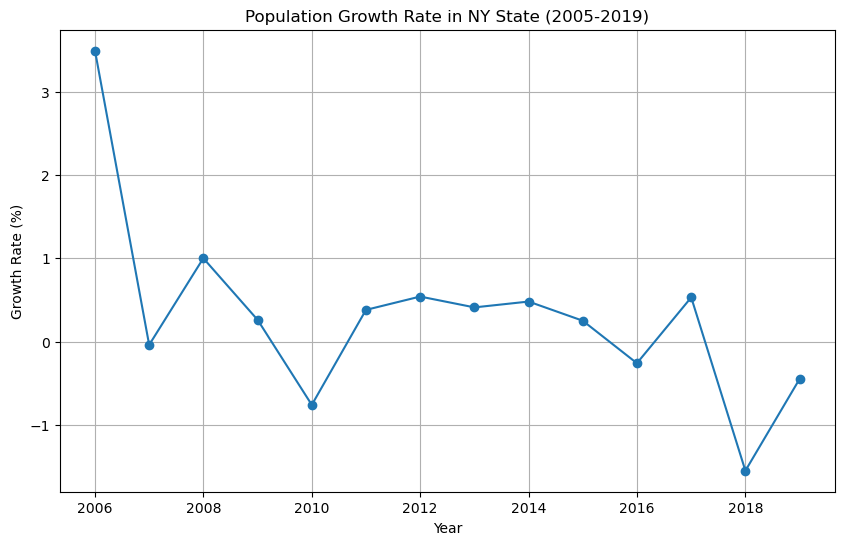

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'
df = pd.DataFrame({
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'population': [18655275, 19306183, 19297729, 19490297, 19541453, 19392283, 19465197, 19570261, 19651127, 19746227, 19795791, 19745289, 19849399, 19542209, 19453561],
    'growth_rate': [None, 3.49, -0.04, 1.00, 0.26, -0.76, 0.38, 0.54, 0.41, 0.48, 0.25, -0.26, 0.53, -1.55, -0.45]
})

# Convert 'year' to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['growth_rate'], marker='o')
plt.title('Population Growth Rate in NY State (2005-2019)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

Explaination: The population has been on a relative decline in New York since 2008. The chart above shows the results.

##  Q2: Income and Population Relationship

/tmp/ipykernel_15688/787164689.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


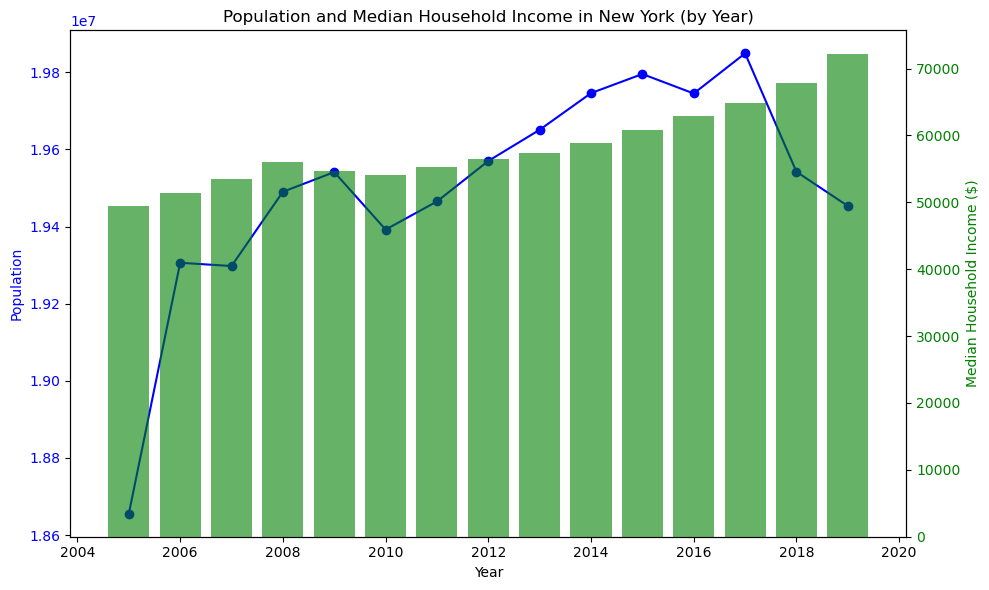

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT 
    p.year,
    p.pop AS population,
    i.income AS median_household_income
FROM population AS p
JOIN income AS i
    ON p.fips = i.fips AND p.year = i.year
JOIN name AS n
    ON p.fips = n.fips
WHERE n.name = 'New York'
ORDER BY p.year;
"""

# --- Load data into pandas ---
df = pd.read_sql(query, conn)

# --- Visualization: Dual-Axis Chart ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Left Y-axis (Population)
ax1.plot(df['year'], df['population'], color='blue', marker='o', label='Population')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right Y-axis (Income)
ax2 = ax1.twinx()
ax2.bar(df['year'], df['median_household_income'], color='green', alpha=0.6, label='Median Household Income')
ax2.set_ylabel('Median Household Income ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title
plt.title('Population and Median Household Income in New York (by Year)')
fig.tight_layout()
plt.show()


Explaination: This table joins the income and population in New York.

## Q3: Student-Defined Question

/tmp/ipykernel_15688/1139908658.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


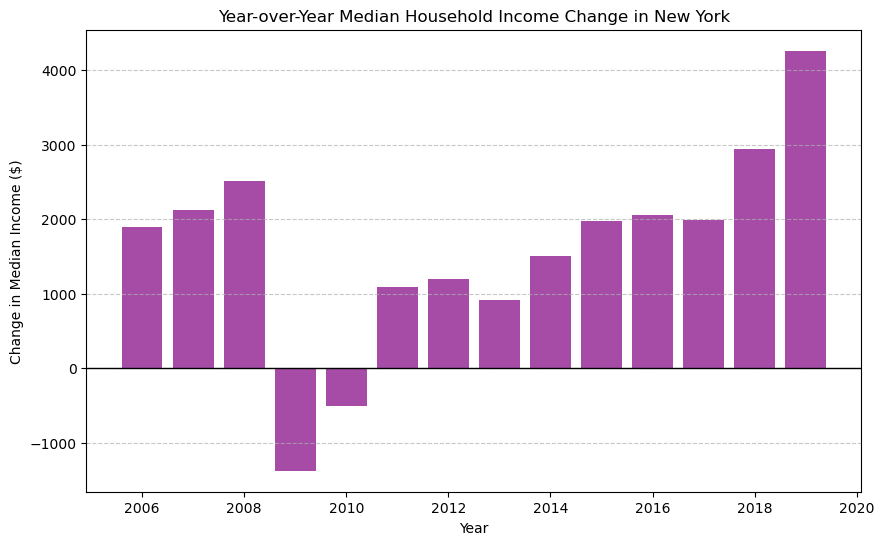

In [34]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

query = """
SELECT 
    i.year,
    i.income AS median_household_income,
    LAG(i.income) OVER (ORDER BY i.year) AS prev_income,
    (i.income - LAG(i.income) OVER (ORDER BY i.year)) AS income_change
FROM income AS i
JOIN name AS n
    ON i.fips = n.fips
WHERE n.name = 'New York'
ORDER BY i.year;
"""

# Use pd.read_sql while connection is open
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
plt.bar(df['year'], df['income_change'], color='purple', alpha=0.7)
plt.axhline(0, color='black', linewidth=1)
plt.title("Year-over-Year Median Household Income Change in New York")
plt.xlabel("Year")
plt.ylabel("Change in Median Income ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Explaination: This chart shows the change in the median income 